# Music Genre Classification - Exploratory Data Analysis (380K)

### Data Files Description

Data files:
* **lyrics.csv**: --

### Import necessary libraries

In [1]:
import string
import os
import math

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [3]:
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer

In [4]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [6]:
# Parameters and definitions
RANDOM_SEED = 0
VAL_SET_SIZE = 0.2

In [7]:
np.random.seed(RANDOM_SEED)
sns.set(style="darkgrid")

### File Paths

In [8]:
DATASET = "../data/380000.csv"
FIGURES_DIR = "../figures/"

### Helper Methods

In [9]:
def load_data():
    """Loads the training and testing sets into the memory.
    """
    return pd.read_csv(DATASET)

### Data Wrangling

In [10]:
df = load_data()

### Exploratory Data Analysis

In [11]:
# Number of records
print("Len. of data set: {}".format(len(df)))

Len. of data set: 362237


In [12]:
# Summary Statistics
df.info() # Outcome: no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [13]:
# Summary Statistics (2)
df.describe()

,index,year
count,362237.000000,362237.000000
mean,181118.000000,2008.537596
std,104568.959068,9.908024
min,0.000000,67.000000
25%,90559.000000,2006.000000
50%,181118.000000,2008.000000
75%,271677.000000,2014.000000
max,362236.000000,2038.000000


In [14]:
# Number of null entries in both datasets
print("Number of null entries in data set {}".format(df.isnull().sum()))

Number of null entries in data set index         0
song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64


In [15]:
# Some examples from the training set
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [16]:
# Different genres
print("Different genres in data set: {}".format(", ".join(df["genre"].unique())))

Different genres in data set: Pop, Hip-Hop, Not Available, Other, Rock, Metal, Country, Jazz, Electronic, Folk, R&B, Indie


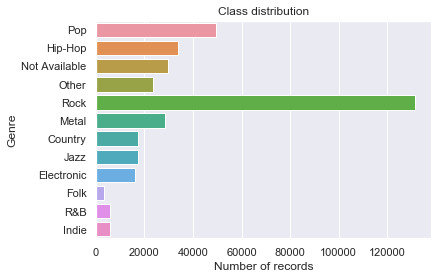

In [17]:
# Visualize different classes for data set
cntplot = sns.countplot(y="genre", data=df)
cntplot.set_title("Class distribution")
cntplot.set_xlabel("Number of records")
cntplot.set_ylabel("Genre")
cntplot.get_figure().savefig(FIGURES_DIR+"1_class_dstr.pdf", bbox_inches="tight")

In [18]:
# Distribution in numbers
df['genre'].value_counts()

Rock             131377
Pop               49444
Hip-Hop           33965
Not Available     29814
Metal             28408
Other             23683
Country           17286
Jazz              17147
Electronic        16205
R&B                5935
Indie              5732
Folk               3241
Name: genre, dtype: int64

In [19]:
# In percentages
df['genre'].value_counts(normalize=True)

Rock             0.362682
Pop              0.136496
Hip-Hop          0.093765
Not Available    0.082305
Metal            0.078424
Other            0.065380
Country          0.047720
Jazz             0.047336
Electronic       0.044736
R&B              0.016384
Indie            0.015824
Folk             0.008947
Name: genre, dtype: float64

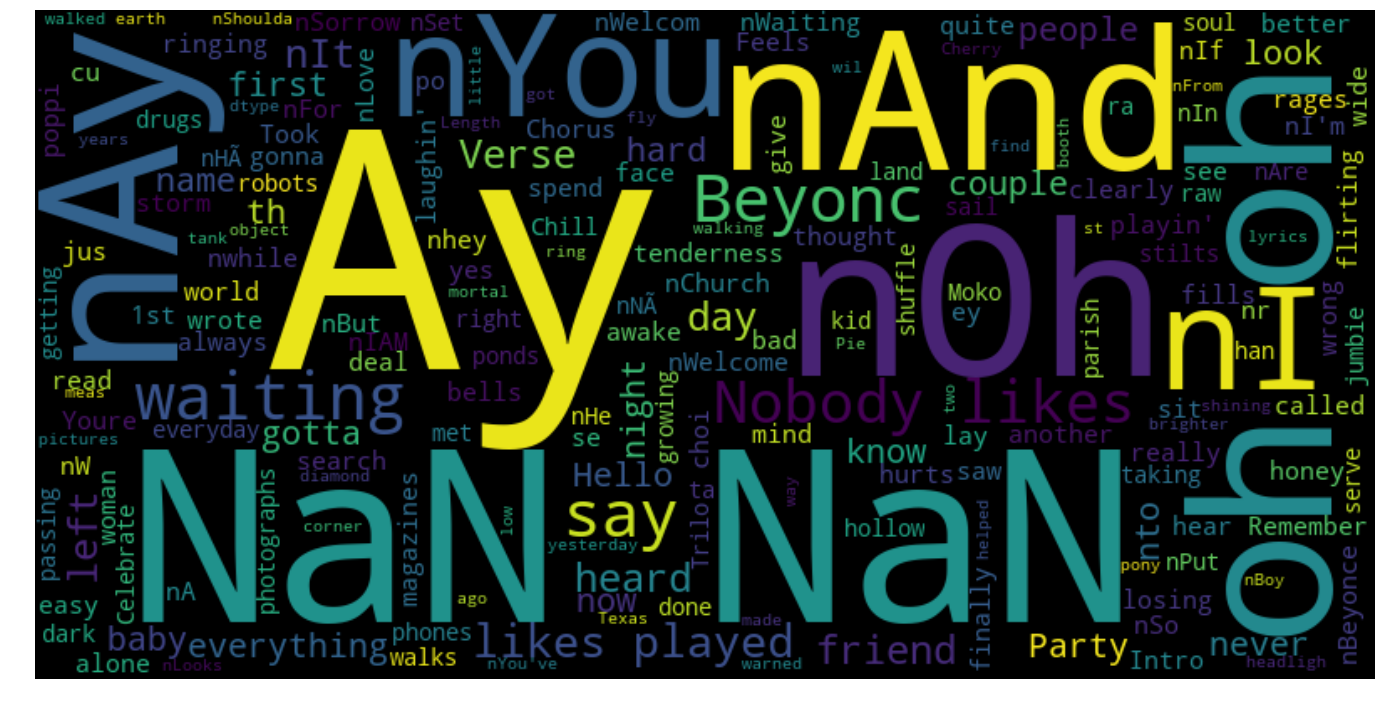

In [20]:
# Word Cloud (most frequently used words)
wc = WordCloud(random_state=0, max_words=200, width=800, height=400).generate(str(df["lyrics"]))
plt.figure(figsize=(24,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(FIGURES_DIR+"2_wc.pdf", bbox_inches="tight")
plt.show()

       Frequency
Word            
'        2510408
,         538487
like      306583
know      284555
love      281432
got       221262
get       215616
one       171341
never     171101
see       168298


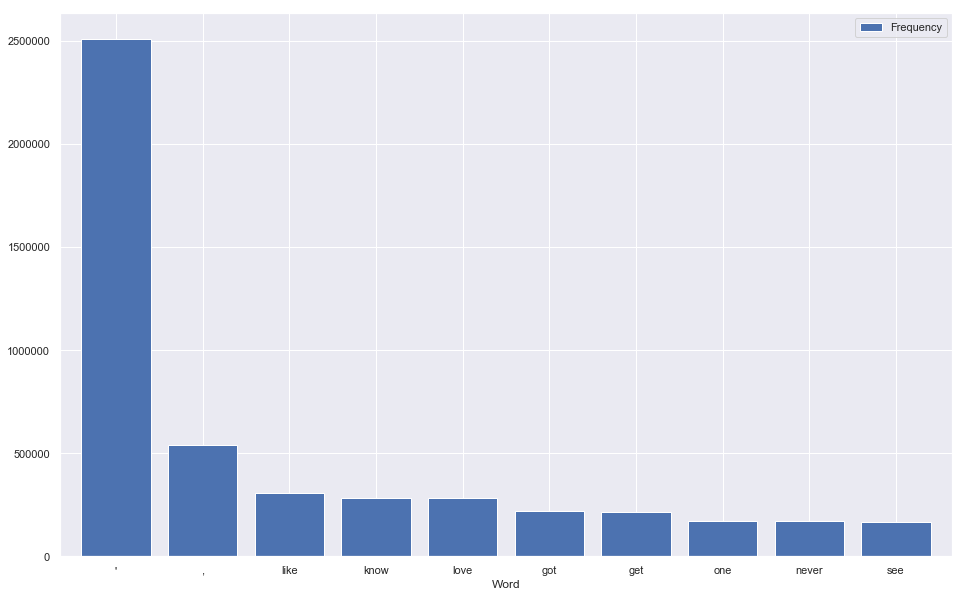

In [21]:
# Credits: https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe
from collections import Counter

top = 10

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.lyrics
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

### Convert categorical column (genre) by performing One Hot Encoding (OHE)

In [22]:
dummies = pd.get_dummies(df['genre'], prefix = 'genre')
df = pd.concat([df, dummies], axis=1)
df.head()

,index,song,year,artist,genre,lyrics,genre_Country,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Metal,genre_Not Available,genre_Other,genre_Pop,genre_R&B,genre_Rock
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",0,0,0,0,0,0,0,0,0,1,0,0
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",0,0,0,0,0,0,0,0,0,1,0,0
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,0,0,0,0,0,0,0,0,0,1,0,0
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",0,0,0,0,0,0,0,0,0,1,0,0
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",0,0,0,0,0,0,0,0,0,1,0,0


### Feature Engineering

In [23]:
def build_features(data, col):
    """"""
    # Number of words on the data set
    data["n_words"] = data[col].apply(lambda x: len(str(x).split()))
    
    # Number of unique words on the data set
    data["uniq_words"] = data[col].apply(lambda x: len(set(str(x).split())))
    
    # Number of characters on data set
    data["n_chars"] = data[col].apply(lambda x: len(str(x)))

    # Number of punctuations on data set
    data["n_punct"] = data[col].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

    # Number of title case words on data set
    data["n_up_words"] = data[col].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

    # Number of title case words on data set
    data["n_titles"] = data[col].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

    # Average length of the words on data set
    data["m_w_len"] = data[col].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    
    return data

In [24]:
df = build_features(df, "lyrics")

In [25]:
# Record the min, max and average value for the new columns (n_words	uniq_words	n_chars	n_punct	n_up_words	n_titles	m_w_len)
df.describe()

,index,year,genre_Country,genre_Electronic,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Metal,genre_Not Available,...,genre_Pop,genre_R&B,genre_Rock,n_words,uniq_words,n_chars,n_punct,n_up_words,n_titles,m_w_len
count,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,...,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000,362237.000000
mean,181118.000000,2008.537596,0.047720,0.044736,0.008947,0.093765,0.015824,0.047336,0.078424,0.082305,...,0.136496,0.016384,0.362682,167.405607,80.054636,844.439497,25.794298,6.281904,28.016718,3.885738
std,104568.959068,9.908024,0.213174,0.206724,0.094166,0.291501,0.124794,0.212358,0.268838,0.274830,...,0.343315,0.126948,0.480775,167.963079,76.705423,851.548763,37.041948,14.400145,32.879896,1.173958
min,0.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,90559.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000
50%,181118.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,147.000000,77.000000,744.000000,14.000000,2.000000,23.000000,3.880282
75%,271677.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,241.000000,111.000000,1211.000000,34.000000,9.000000,40.000000,4.170507
max,362236.000000,2038.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,8195.000000,2843.000000,42132.000000,1851.000000,2537.000000,1572.000000,58.000000


In [26]:
# Sneak peak into the updated training set
df.head()

,index,song,year,artist,genre,lyrics,genre_Country,genre_Electronic,genre_Folk,genre_Hip-Hop,...,genre_Pop,genre_R&B,genre_Rock,n_words,uniq_words,n_chars,n_punct,n_up_words,n_titles,m_w_len
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",0,0,0,0,...,1,0,0,433,153,1961,87,27,56,3.531178
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",0,0,0,0,...,1,0,0,258,135,1270,46,0,0,3.926357
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,0,0,0,0,...,1,0,0,170,112,827,14,14,61,3.870588
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",0,0,0,0,...,1,0,0,522,142,2344,66,40,96,3.492337
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",0,0,0,0,...,1,0,0,312,57,1540,82,10,64,3.939103


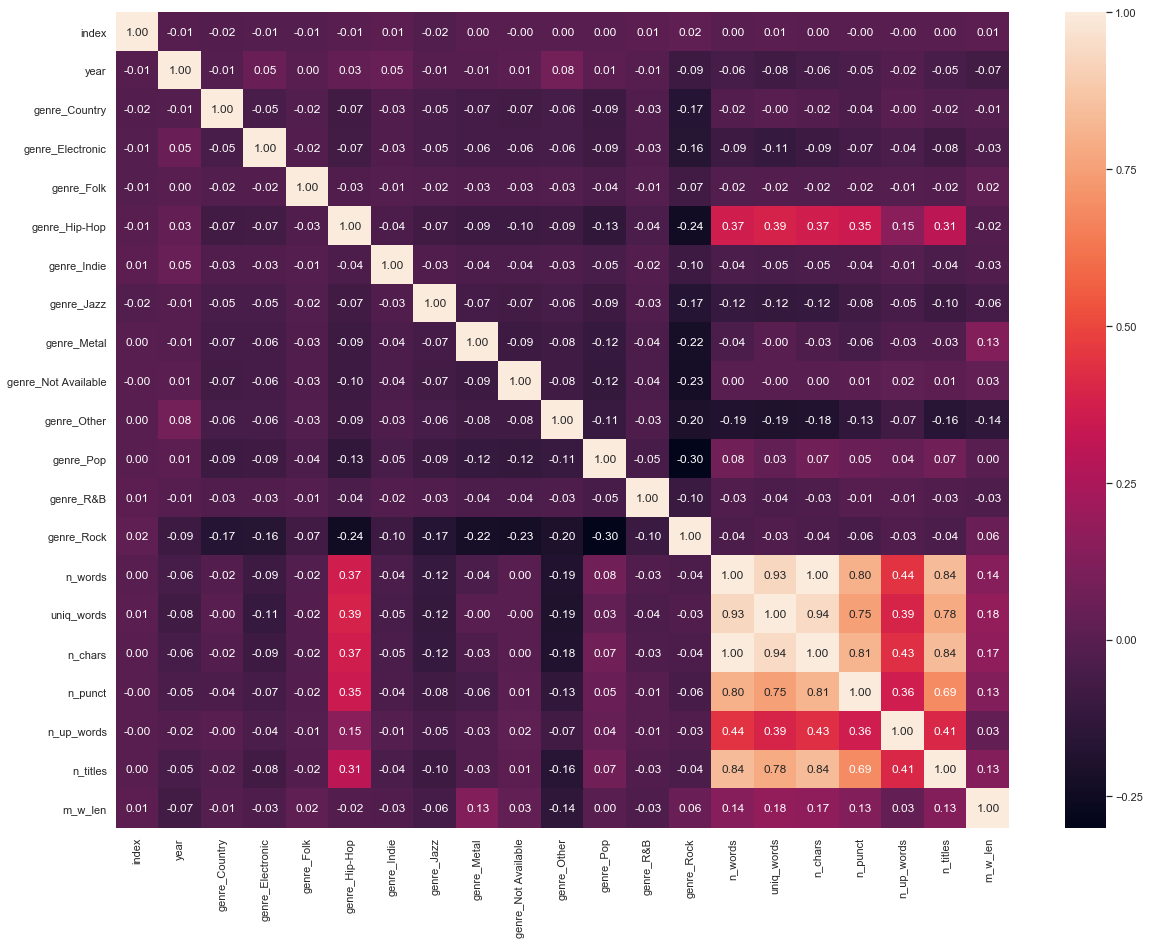

In [27]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(20,15))
ax = plt.subplot(111);
sns.heatmap(corr,
            fmt=".2f",
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax);
plt.savefig(FIGURES_DIR+"3_corr_mat.pdf", bbox_inches="tight")